<a href="https://colab.research.google.com/github/demilade27/Predicting-Monthly-Excess-Returns-of-Market-Index/blob/main/Predicting_Monthly_Excess_Returns_of_Market_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-requisite




## Import Libraries


In [1]:
!pip install -r requirements.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_ccf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf


## Load The Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/demilade27/Predicting-Monthly-Excess-Returns-of-Market-Index/d2f2cb8478612fa4e8fd4e87628375d44f6cb72e/data.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Analyse the dataset

In [4]:
# @title Analyse data statistics
# @markdown Based on the results of the analysis we can spot that some of the data have high standard deviation (Add More to This)
df.describe()


,dfy,infl,svar,de,lty,tms,tbl,dfr,dp,dy,ltr,ep,b/m,ntis,mr,R
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,0.011160,0.002473,0.002916,-0.647478,0.049656,0.016725,0.032931,0.000452,-3.408696,-3.403723,0.004489,-2.761218,0.552159,0.015991,0.009476,0.006740
std,0.006781,0.005266,0.005998,0.327729,0.028082,0.012924,0.030649,0.014086,0.476560,0.474459,0.024952,0.420533,0.268291,0.025712,0.054315,0.054449
min,0.003200,-0.020548,0.000072,-1.244209,0.006200,-0.036500,0.000100,-0.097600,-4.523640,-4.530894,-0.112400,-4.836478,0.120510,-0.055954,-0.287461,-0.287761
25%,0.007000,0.000000,0.000695,-0.869874,0.027400,0.008200,0.003800,-0.005100,-3.846171,-3.837780,-0.007625,-2.986049,0.323772,0.003618,-0.016829,-0.019785
50%,0.009000,0.002422,0.001269,-0.636276,0.041000,0.017050,0.027750,0.000600,-3.374832,-3.366197,0.003000,-2.810399,0.529101,0.015954,0.012951,0.010006
75%,0.013025,0.005098,0.002491,-0.501965,0.067325,0.025700,0.050700,0.005900,-3.043790,-3.039180,0.016100,-2.481701,0.738709,0.027028,0.038927,0.035815
max,0.056400,0.058824,0.073153,1.379530,0.148200,0.045500,0.163000,0.073700,-1.873246,-1.912904,0.152300,-1.774952,2.028478,0.177040,0.414312,0.413312


In [5]:
# @title Check for null or zero values
# @markdown **Analysis**


# @markdown ---


# @markdown There are no null values in the dataset

# @markdown Analysing the dataset values there are zero values
# @markdown * INFL: There are 239 zero values showing signs of Deflationary Stagnation
# @markdown * DE:
# @markdown * LTR:
# @markdown * TMS:
# @markdown * DFR:
print(df.isnull().sum())
print(df.duplicated().sum())
print((df == 0).sum())

dfy     0
infl    0
svar    0
de      0
lty     0
tms     0
tbl     0
dfr     0
dp      0
dy      0
ltr     0
ep      0
b/m     0
ntis    0
mr      0
R       0
dtype: int64
0
dfy       0
infl    239
svar      0
de        1
lty       0
tms       1
tbl       0
dfr       9
dp        0
dy        0
ltr       4
ep        0
b/m       0
ntis      0
mr        0
R         0
dtype: int64



## Data Visualization


Text(0.5, 1.0, 'Correlation Heatmap')

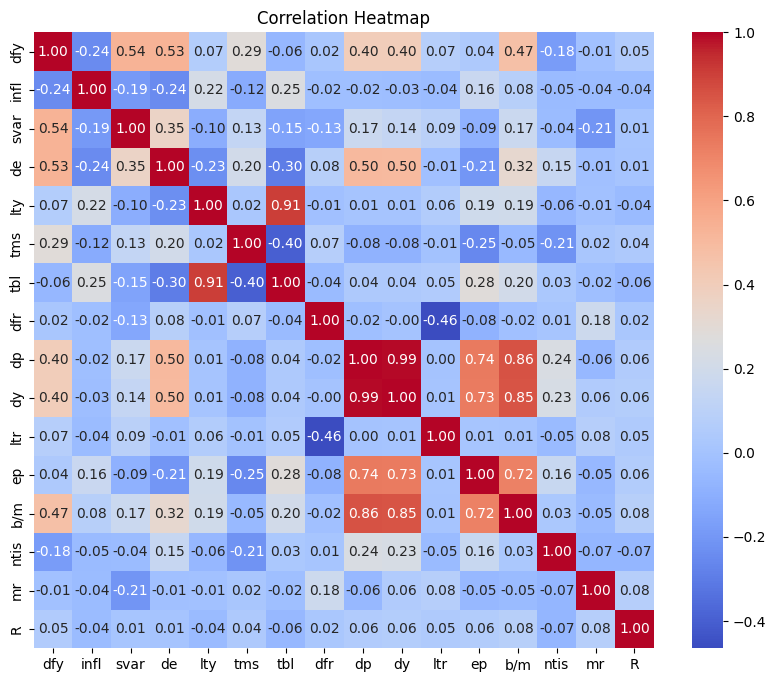

In [6]:
# @title Correlation analysis
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm")
plt.title('Correlation Heatmap')

#High correlation between dp, dy, ep and b/m

In [7]:
import pandas as pd

# Suppose df is your DataFrame loaded with data including the target variable R

# Calculate correlation matrix
correlation_matrix = df.corr()

# Extract the column for the target variable R
target_correlation = correlation_matrix['R']

# Sort by absolute value of correlation with R
sorted_correlation = target_correlation.abs().sort_values()

# Display the variables with the least correlation
print(sorted_correlation)  # Adjust to show more or fewer variables


de      0.008739
svar    0.014068
dfr     0.024690
infl    0.037758
tms     0.040256
lty     0.044029
ltr     0.047326
dfy     0.050634
dp      0.055683
ep      0.056292
tbl     0.057317
dy      0.063345
ntis    0.066061
mr      0.076928
b/m     0.080325
R       1.000000
Name: R, dtype: float64


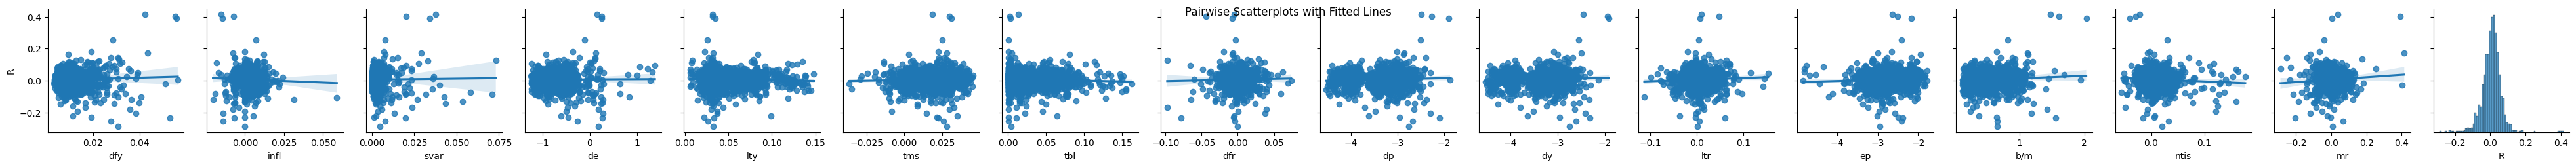

In [8]:
# @title Residual plot
sns.pairplot(df,y_vars=['R'],x_vars=df.select_dtypes(include='number').columns,kind='reg')
plt.suptitle("Pairwise Scatterplots with Fitted Lines")
plt.show()

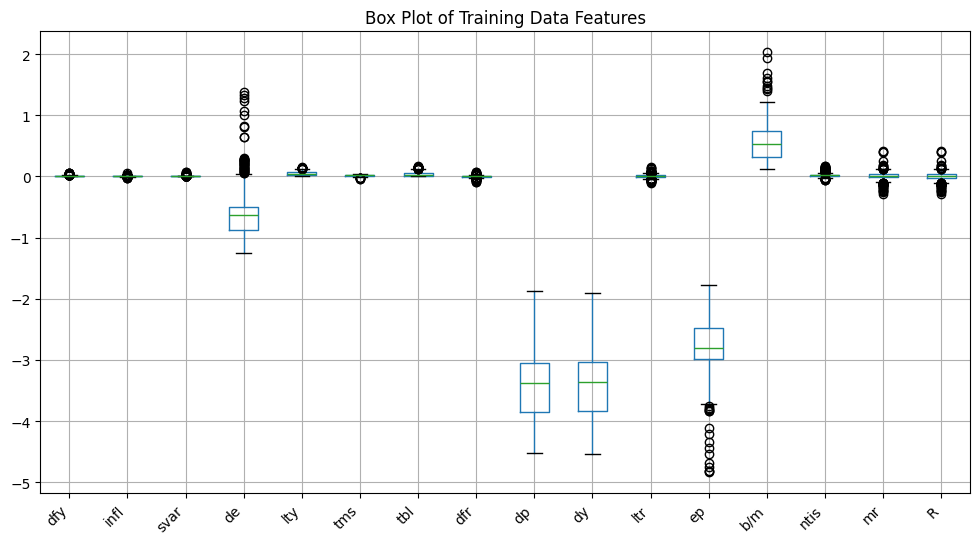

In [9]:
# @title Box Plot
# @markdown This is the analysis of the skewness of the data

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Box Plot of Training Data Features')
plt.xticks(rotation=45, ha='right')
plt.show()

## Autocorrelation and Partial Autocorrelation Analysis

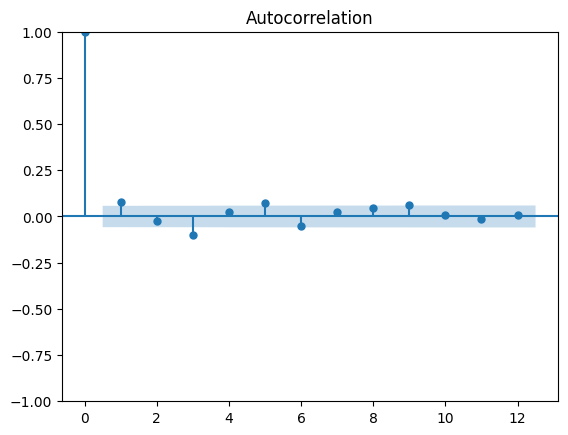

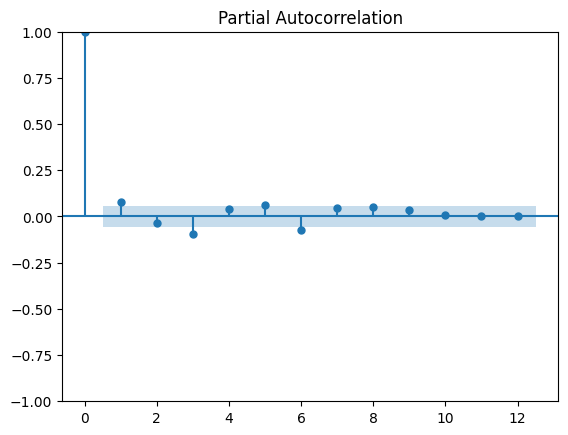

In [10]:
# @title 12 month
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example using 'mr' series
plot_acf(df['mr'],lags=12)
plot_pacf(df['mr'],lags=12)
plt.show()

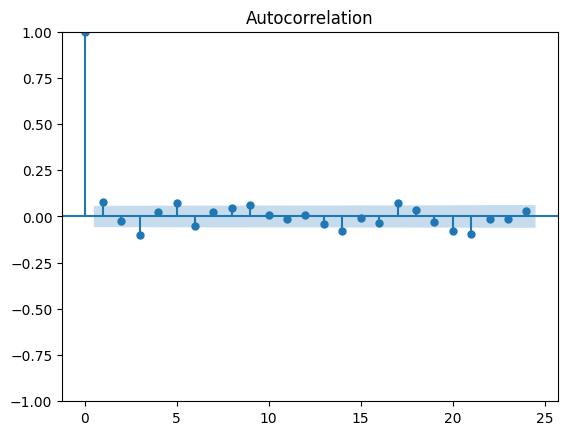

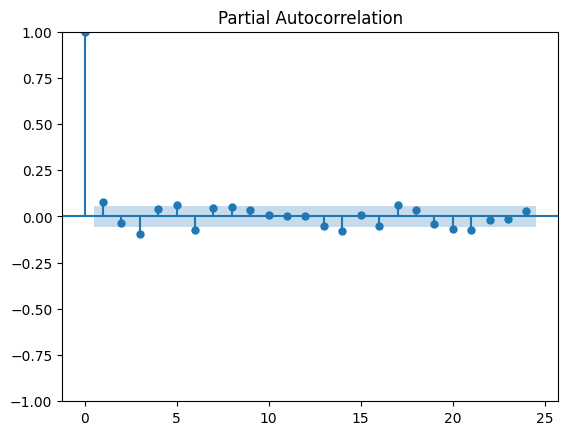

In [11]:
# @title 12 month
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example using 'mr' series
plot_acf(df['mr'],lags=24)
plot_pacf(df['mr'],lags=24)
plt.show()


# Pre-processing

## Feature Engineering

In [12]:
# @title Drop tbl AND lty because th
# @markdown Dropping LTY and TBL because
df = df.drop('lty', axis=1)


In [13]:
# @title Create a new feature for B/M and DP
df['dp_dy'] = (df['dp'] / df['dy'])
df = df.drop('dp', axis=1)
df = df.drop('dy', axis=1)

In [14]:
# @title 3-month moving average and rolling volatility for stock variance and
df['dfy_ma3'] = df['dfy'].rolling(window=3).mean()
df = df.drop('dfy', axis=1)



In [15]:
# @title 3-month moving average and rolling volatility for stock variance and
df['svar_ma3'] = df['svar'].rolling(window=3).mean()
df['svar_vol3'] = df['svar'].rolling(window=3).std()
# df = df.drop('svar', axis=1)


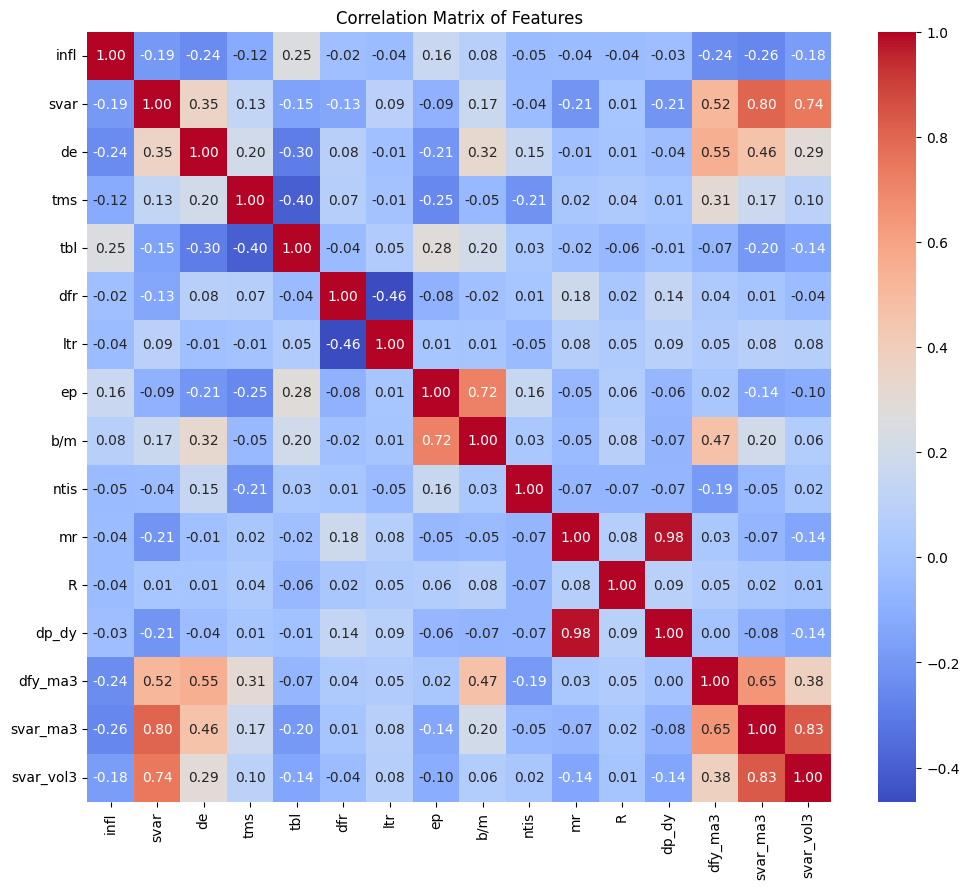

In [16]:
# prompt: plot correlation

# Assuming df is already loaded as in your provided code

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [17]:
# @title Lag Market Returns
lags_mr = list(range(1, 13,2)) + list(range(24, 60, 12))
# Apply lags for 'mr'
for lag in lags_mr:
    df[f'mr_lag{lag}'] = df['mr'].shift(lag)

# Handle missing values
df = df.fillna(method='ffill').fillna(method='bfill')

assert not df.isnull().values.any(), "NaN values still exist!"

/var/folders/r2/cgmvdhsx5394sjxnpj80jpxw0000gn/T/ipykernel_81067/4042681457.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


In [18]:
# @title Lag Term Spread and Default Yield Spread
lags_tms_dfy = list(range(1, 6, 2) ) # Monthly lags up to 12 months
for lag in lags_tms_dfy:
    df[f'tms_lag{lag}'] = df['tms'].shift(lag)
    df[f'ntis_lag{lag}'] = df['ntis'].shift(lag)
    df[f'dfy_ma3_lag{lag}'] = df['dfy_ma3'].shift(lag)

# Handle missing values
df = df.fillna(method='ffill').fillna(method='bfill')
assert not df.isnull().values.any(), "NaN values still exist!"

/var/folders/r2/cgmvdhsx5394sjxnpj80jpxw0000gn/T/ipykernel_81067/2985834453.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


In [19]:
# @title Lag Inflation, Long Term Rate and
lags_infl_ltr_bm = list(range(1, 6,2))  # Monthly lags for slower-moving variables
# Apply lags for 'infl', 'ltr', and 'b/m'
for lag in lags_infl_ltr_bm:
    df[f'infl_lag{lag}'] = df['infl'].shift(lag)
    df[f'ltr_lag{lag}'] = df['ltr'].shift(lag)
df[f'b/m{1}'] = df['b/m'].shift(1)
# Handle missing values
df = df.fillna(method='ffill').fillna(method='bfill')
assert not df.isnull().values.any(), "NaN values still exist!"



/var/folders/r2/cgmvdhsx5394sjxnpj80jpxw0000gn/T/ipykernel_81067/2908013008.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


In [20]:
if 'b/m' in df.columns:
  df = df.drop('b/m', axis=1)
  print("Column 'b/m' removed successfully.")
else:
  print("Column 'b/m' not found in the DataFrame.")

Column 'b/m' removed successfully.


In [21]:
df.describe()

,infl,svar,de,tms,tbl,dfr,ltr,ep,ntis,mr,...,tms_lag5,ntis_lag5,dfy_ma3_lag5,infl_lag1,ltr_lag1,infl_lag3,ltr_lag3,infl_lag5,ltr_lag5,b/m1
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,...,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,0.002473,0.002916,-0.647478,0.016725,0.032931,0.000452,0.004489,-2.761218,0.015991,0.009476,...,0.016734,0.016263,0.011152,0.002474,0.004472,0.002482,0.004565,0.002480,0.004591,0.552363
std,0.005266,0.005998,0.327729,0.012924,0.030649,0.014086,0.024952,0.420533,0.025712,0.054315,...,0.012914,0.025747,0.006697,0.005267,0.024943,0.005268,0.024822,0.005259,0.024776,0.268118
min,-0.020548,0.000072,-1.244209,-0.036500,0.000100,-0.097600,-0.112400,-4.836478,-0.055954,-0.287461,...,-0.036500,-0.055954,0.003333,-0.020548,-0.112400,-0.020548,-0.112400,-0.020548,-0.112400,0.120510
25%,0.000000,0.000695,-0.869874,0.008200,0.003800,-0.005100,-0.007625,-2.986049,0.003618,-0.016829,...,0.008200,0.004458,0.006992,0.000000,-0.007625,0.000000,-0.007600,0.000000,-0.007525,0.323967
50%,0.002422,0.001269,-0.636276,0.017050,0.027750,0.000600,0.003000,-2.810399,0.015954,0.012951,...,0.017050,0.016296,0.009067,0.002422,0.003000,0.002436,0.003000,0.002443,0.003050,0.529101
75%,0.005098,0.002491,-0.501965,0.025700,0.050700,0.005900,0.016100,-2.481701,0.027028,0.038927,...,0.025700,0.027165,0.013033,0.005106,0.016025,0.005134,0.016025,0.005151,0.015925,0.738709
max,0.058824,0.073153,1.379530,0.045500,0.163000,0.073700,0.152300,-1.774952,0.177040,0.414312,...,0.045500,0.177040,0.055867,0.058824,0.152300,0.058824,0.152300,0.058824,0.152300,2.028478


In [22]:
df.columns

Index(['infl', 'svar', 'de', 'tms', 'tbl', 'dfr', 'ltr', 'ep', 'ntis', 'mr',
       'R', 'dp_dy', 'dfy_ma3', 'svar_ma3', 'svar_vol3', 'mr_lag1', 'mr_lag3',
       'mr_lag5', 'mr_lag7', 'mr_lag9', 'mr_lag11', 'mr_lag24', 'mr_lag36',
       'mr_lag48', 'tms_lag1', 'ntis_lag1', 'dfy_ma3_lag1', 'tms_lag3',
       'ntis_lag3', 'dfy_ma3_lag3', 'tms_lag5', 'ntis_lag5', 'dfy_ma3_lag5',
       'infl_lag1', 'ltr_lag1', 'infl_lag3', 'ltr_lag3', 'infl_lag5',
       'ltr_lag5', 'b/m1'],
      dtype='object')

### Remove skewness

In [23]:
df.skew()

infl            1.056650
svar            6.219337
de              1.511733
tms            -0.211256
tbl             1.134915
dfr            -0.597824
ltr             0.508250
ep             -0.491433
ntis            1.635125
mr              0.329734
R               0.366232
dp_dy           0.063173
dfy_ma3         2.443629
svar_ma3        4.215168
svar_vol3       6.374388
mr_lag1         0.330876
mr_lag3         0.333717
mr_lag5         0.332568
mr_lag7         0.331531
mr_lag9         0.333063
mr_lag11        0.329019
mr_lag24        0.327627
mr_lag36        0.331884
mr_lag48        0.333167
tms_lag1       -0.210896
ntis_lag1       1.631852
dfy_ma3_lag1    2.444170
tms_lag3       -0.211019
ntis_lag3       1.623575
dfy_ma3_lag3    2.444996
tms_lag5       -0.210915
ntis_lag5       1.613447
dfy_ma3_lag5    2.445542
infl_lag1       1.055631
ltr_lag1        0.510134
infl_lag3       1.050807
ltr_lag3        0.537465
infl_lag5       1.049491
ltr_lag5        0.542438
b/m1            0.807601


In [24]:
df.describe()

,infl,svar,de,tms,tbl,dfr,ltr,ep,ntis,mr,...,tms_lag5,ntis_lag5,dfy_ma3_lag5,infl_lag1,ltr_lag1,infl_lag3,ltr_lag3,infl_lag5,ltr_lag5,b/m1
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,...,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,0.002473,0.002916,-0.647478,0.016725,0.032931,0.000452,0.004489,-2.761218,0.015991,0.009476,...,0.016734,0.016263,0.011152,0.002474,0.004472,0.002482,0.004565,0.002480,0.004591,0.552363
std,0.005266,0.005998,0.327729,0.012924,0.030649,0.014086,0.024952,0.420533,0.025712,0.054315,...,0.012914,0.025747,0.006697,0.005267,0.024943,0.005268,0.024822,0.005259,0.024776,0.268118
min,-0.020548,0.000072,-1.244209,-0.036500,0.000100,-0.097600,-0.112400,-4.836478,-0.055954,-0.287461,...,-0.036500,-0.055954,0.003333,-0.020548,-0.112400,-0.020548,-0.112400,-0.020548,-0.112400,0.120510
25%,0.000000,0.000695,-0.869874,0.008200,0.003800,-0.005100,-0.007625,-2.986049,0.003618,-0.016829,...,0.008200,0.004458,0.006992,0.000000,-0.007625,0.000000,-0.007600,0.000000,-0.007525,0.323967
50%,0.002422,0.001269,-0.636276,0.017050,0.027750,0.000600,0.003000,-2.810399,0.015954,0.012951,...,0.017050,0.016296,0.009067,0.002422,0.003000,0.002436,0.003000,0.002443,0.003050,0.529101
75%,0.005098,0.002491,-0.501965,0.025700,0.050700,0.005900,0.016100,-2.481701,0.027028,0.038927,...,0.025700,0.027165,0.013033,0.005106,0.016025,0.005134,0.016025,0.005151,0.015925,0.738709
max,0.058824,0.073153,1.379530,0.045500,0.163000,0.073700,0.152300,-1.774952,0.177040,0.414312,...,0.045500,0.177040,0.055867,0.058824,0.152300,0.058824,0.152300,0.058824,0.152300,2.028478


## Data Scaling

## Data Transformation
The evaluation of the data revealed a high standard deviation in certain features. To mitigate the potential impact of this variability and ensure features contribute equally to model training, data standardization was applied. This process transforms the data to have zero mean and unit variance, effectively balancing the dataset.

### Data Spliting

In [25]:
split_date='2019-01-01'
train_data=df[df.index <split_date]
x_train=train_data.drop('R',axis=1)
y_train=train_data[['R']]
test_data=df[df.index >=split_date]
x_test=test_data.drop('R',axis=1)
y_test=test_data[['R']]
x_train.shape


(1104, 39)

In [26]:
scaler_x = StandardScaler()
columns = x_train.columns

x_train[columns] = scaler_x.fit_transform(x_train[columns])  # Fit on x_train, transform x_train
x_test[columns] = scaler_x.transform(x_test[columns])        # Transform x_test using the same scaler
x_train.describe()


,infl,svar,de,tms,tbl,dfr,ltr,ep,ntis,mr,...,tms_lag5,ntis_lag5,dfy_ma3_lag5,infl_lag1,ltr_lag1,infl_lag3,ltr_lag3,infl_lag5,ltr_lag5,b/m1
count,1104.000000,1.104000e+03,1.104000e+03,1.104000e+03,1.104000e+03,1104.000000,1.104000e+03,1.104000e+03,1104.000000,1.104000e+03,...,1.104000e+03,1.104000e+03,1.104000e+03,1.104000e+03,1.104000e+03,1.104000e+03,1.104000e+03,1104.000000,1104.000000,1.104000e+03
mean,0.000000,-7.723291e-17,-1.029772e-16,2.574430e-16,-1.029772e-16,0.000000,-1.287215e-17,-6.693519e-16,0.000000,1.448117e-17,...,2.059544e-16,5.148860e-17,1.609019e-16,-1.287215e-17,1.930823e-17,-1.287215e-17,-1.287215e-17,0.000000,0.000000,-2.059544e-16
std,1.000453,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00,1.000453,1.000453e+00,1.000453e+00,1.000453,1.000453e+00,...,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00,1.000453e+00,1.000453,1.000453,1.000453e+00
min,-4.334089,-4.854632e-01,-1.849301e+00,-4.130574e+00,-1.095474e+00,-7.154197,-4.795727e+00,-5.033374e+00,-2.824147,-5.478076e+00,...,-4.122536e+00,-2.839755e+00,-1.159668e+00,-4.334052e+00,-4.801779e+00,-4.334593e+00,-4.819021e+00,-4.335236,-4.821035,-1.685676e+00
25%,-0.458492,-3.775397e-01,-6.712214e-01,-6.411073e-01,-9.528309e-01,-0.397168,-4.785229e-01,-5.034165e-01,-0.436538,-4.827944e-01,...,-6.458269e-01,-4.439770e-01,-6.264143e-01,-4.590860e-01,-4.776984e-01,-4.606161e-01,-4.792745e-01,-0.462165,-0.478899,-8.602058e-01
50%,-0.002723,-2.790525e-01,2.515773e-02,3.675819e-02,-1.456002e-01,0.012348,-6.482500e-02,-1.235244e-01,0.000969,6.158086e-02,...,3.874622e-02,-9.270953e-03,-3.182035e-01,-2.839715e-03,-6.334148e-02,-2.949829e-03,-6.362571e-02,-0.001732,-0.063206,-1.007907e-01
75%,0.494096,-7.143651e-02,4.253461e-01,6.915147e-01,5.684261e-01,0.392614,4.604895e-01,6.507735e-01,0.406949,5.398550e-01,...,6.925521e-01,3.999060e-01,2.896566e-01,4.945554e-01,4.587071e-01,5.006097e-01,4.567695e-01,0.502964,0.456409,6.818500e-01
max,10.636355,1.190379e+01,6.149646e+00,2.185900e+00,4.185565e+00,5.365319,6.046436e+00,2.321679e+00,6.213600,7.472241e+00,...,2.184768e+00,6.207468e+00,6.550494e+00,1.063395e+01,6.057653e+00,1.062959e+01,6.072005e+00,10.625450,6.073405,5.523868e+00


In [27]:
# # Example for 'infl'
# infl_outliers = df[(df['infl'] > df['infl'].quantile(0.99))]
# print(infl_outliers)


<Axes: >

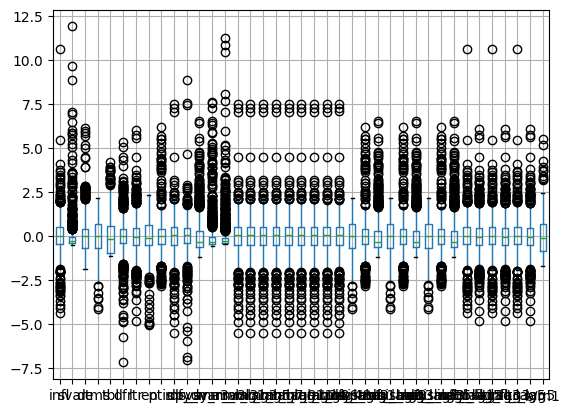

In [28]:
x_train.boxplot()

# Models

## Linear Regression

### OLS

In [29]:
# @title Training
ols = LinearRegression()
ols = ols.fit(x_train, y_train)
y_insample_pred_ols = ols.predict(x_train)
y_outsample_pred_ols = ols.predict(x_test)


In [30]:
# prompt: generate the a list of coefficents and their importance

import pandas as pd
import numpy as np

# Assuming 'ols' is the fitted Linear Regression model from your code
# Access coefficients
coefficients = ols.coef_

# Access feature names
feature_names = x_train.columns

# Create a DataFrame for coefficients and their importance
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})

# Sort by absolute value of coefficients (importance)
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)
coefficients_df = coefficients_df.drop(columns=['Abs_Coefficient'])

# Display the coefficients and their importance
coefficients_df

,Feature,Coefficient
28,dfy_ma3_lag3,-0.053603
25,dfy_ma3_lag1,0.037604
10,dp_dy,0.024569
30,ntis_lag5,-0.023141
9,mr,-0.022753
31,dfy_ma3_lag5,0.017254
27,ntis_lag3,0.017024
24,ntis_lag1,0.011622
8,ntis,-0.009673
38,b/m1,0.009672


### Ridge

In [31]:
# @title Time serires Cross validation
tscv = TimeSeriesSplit(n_splits=4, test_size=12 )


In [32]:
# @title Alpha Cross Validation
alphas = np.logspace(-4, 4, 100)
ridge_cv = RidgeCV(alphas=alphas, cv=tscv, scoring='neg_mean_squared_error')
ridge_cv.fit(x_train, y_train)

RidgeCV(alphas=array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-0...
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
        cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=12),
        scoring='neg_mean_squared_error')

In [33]:
# @title Training
ridge = Ridge(alpha=ridge_cv.alpha_,max_iter=1000,fit_intercept=False)
ridge.fit(x_train, y_train)
y_insample_pred_ridge = ridge.predict(x_train)
y_outsample_pred_ridge = ridge.predict(x_test)


### Lasso

In [34]:

# @title Time serires Cross validation
tscv = TimeSeriesSplit(n_splits=4, test_size=12 )

In [35]:
# @title Alpha Cross Validation
alphas = np.logspace(-4, 4, 100)  # Explore smaller values
lasso_cv = LassoCV(alphas=alphas, cv=tscv)
lasso_cv.fit(x_train, y_train)

/opt/anaconda3/envs/predicting_returns/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-0...
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
        cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=12))

In [36]:
# @ Analysing the coefficent
coefficients = lasso_cv.coef_

feature_names = x_train.columns
dropped_features = feature_names[np.where(coefficients ==0)]
print(dropped_features)
import numpy as np

importance = np.abs(coefficients)
sorted_indices = np.argsort(importance)[::-1]  # Indices sorted by importance

# If you have feature names (e.g., from a pandas DataFrame):
for i in sorted_indices:
    print(f"{feature_names[i]}: {importance[i]}")

Index(['ep', 'mr_lag48', 'tms_lag1', 'tms_lag3', 'tms_lag5'], dtype='object')
dfy_ma3_lag3: 0.03623351274074428
ntis_lag5: 0.019824314563783578
dp_dy: 0.0196893817799307
mr: 0.017303617881896608
dfy_ma3_lag1: 0.015123544302823281
ntis_lag3: 0.013649206814580988
b/m1: 0.009955663416046933
dfy_ma3_lag5: 0.009608729643934938
dfy_ma3: 0.008970248118061092
ntis_lag1: 0.0050861254673135944
dfr: 0.0046742162155028605
ltr: 0.004425760028759251
mr_lag3: 0.004381254448255009
mr_lag5: 0.004366906788027641
infl_lag3: 0.003808259636854856
tbl: 0.003773315874991953
de: 0.003586844604395687
infl_lag5: 0.003405218563612699
ltr_lag5: 0.0029046806867210695
ntis: 0.002880635549898843
mr_lag24: 0.0023536000410317834
mr_lag7: 0.002253883927763973
svar_vol3: 0.0020069181682480113
mr_lag36: 0.0016320896191596812
tms: 0.001179710775329037
mr_lag1: 0.0009686506244110328
infl: 0.000938344169526665
ltr_lag3: 0.0008899410663743468
svar: 0.0008418362675760593
svar_ma3: 0.0006261085323385189
mr_lag9: 0.000612531439

In [37]:
# @title Training
lasso = Lasso(alpha=lasso_cv.alpha_,max_iter=1000,fit_intercept=False)
lasso.fit(x_train, y_train)
y_insample_pred_lasso = lasso.predict(x_train)
y_outsample_pred_lasso = lasso.predict(x_test)


## Random Forest

In [38]:
# print('MSE test set', round (mse_test, 2))
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Implement Random Forest with extensive hyperparameter tuning
rf = RandomForestRegressor(random_state=42)

rf_params = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10, 15],
}
rf_random = RandomizedSearchCV(
    rf, rf_params, cv=TimeSeriesSplit(n_splits=4, test_size=12), scoring="neg_mean_squared_error"
)

rf_random.fit(x_train, y_train)
print("Best Random Forest Params:", rf_random.best_params_)

# Predict and evaluate Random Forest - In-sample and Out-of-sample
y_train_pred_rf = rf_random.predict(x_train)  # In-sample predictions
y_test_pred_rf = rf_random.predict(x_test)    # Out-of-sample predictions

# In-sample evaluation
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
print(f"Random Forest - Training MSE: {mse_train_rf:.4f}, Training R²: {r2_train_rf:.4f}")

# Out-of-sample evaluation
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
print(f"Random Forest - Testing MSE: {mse_test_rf:.4f}, Testing R²: {r2_test_rf:.4f}")

/opt/anaconda3/envs/predicting_returns/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/predicting_returns/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/predicting_returns/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/predicting_returns/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vec

Best Random Forest Params: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 30}
Random Forest - Training MSE: 0.0004, Training R²: 0.8528
Random Forest - Testing MSE: 0.0037, Testing R²: -0.2088


# Performance Test

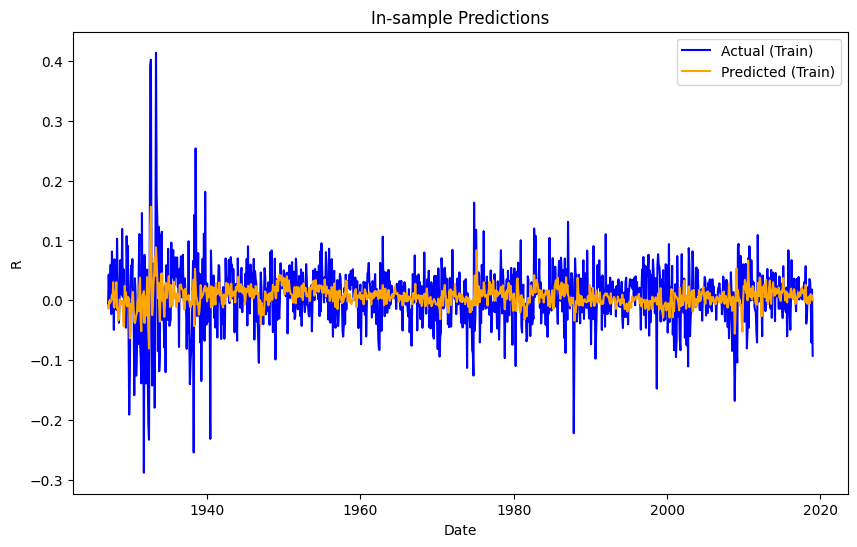

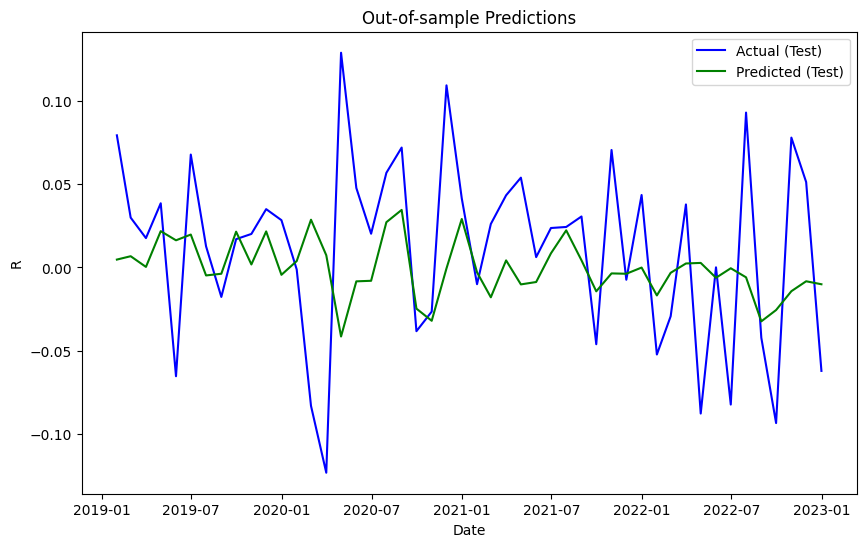

In [39]:
import matplotlib.pyplot as plt

# In-sample Predictions
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train, label="Actual (Train)", color="blue")
plt.plot(y_train.index, y_insample_pred_ols, label="Predicted (Train)", color="orange")
plt.title("In-sample Predictions")
plt.xlabel("Date")
plt.ylabel("R")
plt.legend()
plt.show()

# Out-of-sample Predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual (Test)", color="blue")
plt.plot(y_test.index, y_outsample_pred_ols, label="Predicted (Test)", color="green")
plt.title("Out-of-sample Predictions")
plt.xlabel("Date")
plt.ylabel("R")
plt.legend()
plt.show()


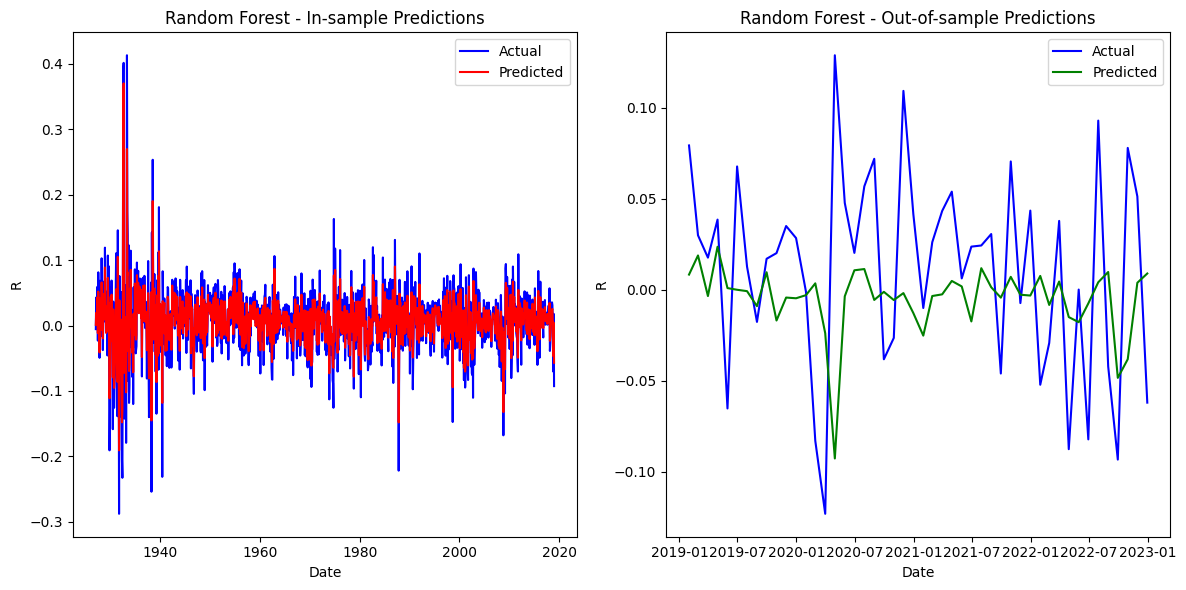

In [40]:
# prompt: plot the out sample and in sample for my decision tree

# Assuming y_test, y_test_pred_rf (from Random Forest), y_train, y_train_pred_rf are already defined

# Plot for Random Forest
plt.figure(figsize=(12, 6))

# In-sample plot
plt.subplot(1, 2, 1)
plt.plot(y_train.index, y_train, label='Actual', color='blue')
plt.plot(y_train.index, y_train_pred_rf, label='Predicted', color='red')
plt.title('Random Forest - In-sample Predictions')
plt.xlabel('Date')
plt.ylabel('R')
plt.legend()

# Out-of-sample plot
plt.subplot(1, 2, 2)
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_test_pred_rf, label='Predicted', color='green')
plt.title('Random Forest - Out-of-sample Predictions')
plt.xlabel('Date')
plt.ylabel('R')
plt.legend()

plt.tight_layout()
plt.show()

In [41]:
# @title In-sample Performance Comparism

mse_insample_ols = mean_squared_error(y_train, y_insample_pred_ols)
r2_insample_ols = r2_score(y_train, y_insample_pred_ols)
mse_insample_ridge = mean_squared_error(y_train, y_insample_pred_ridge)
r2_insample_ridge = r2_score(y_train, y_insample_pred_ridge)
mse_insample_lasso = mean_squared_error(y_train, y_insample_pred_lasso)
r2_insample_lasso = r2_score(y_train, y_insample_pred_lasso)
print('Model Insample Performance Comparison:')
print(f'OLS MSE: {mse_insample_ols:.4f}, R-squared: {r2_insample_ols:.4f}')
print(f'Ridge MSE: {mse_insample_ridge:.4f}, R-squared: {r2_insample_ridge:.4f}')
print(f'Lasso MSE: {mse_insample_lasso:.4f}, R-squared: {r2_insample_lasso:.4f}')


Model Insample Performance Comparison:
OLS MSE: 0.0027, R-squared: 0.0961
Ridge MSE: 0.0027, R-squared: 0.0816
Lasso MSE: 0.0027, R-squared: 0.0789


In [42]:
# @title out-sample Performance Comparism

mse_outsample_ols = mean_squared_error(y_test, y_outsample_pred_ols)
r2_outsample_ols = r2_score(y_test, y_outsample_pred_ols)
mse_outsample_ridge = mean_squared_error(y_test, y_outsample_pred_ridge)
r2_outsample_ridge = r2_score(y_test, y_outsample_pred_ridge)
mse_outsample_lasso = mean_squared_error(y_test, y_outsample_pred_lasso)
r2_outsample_lasso = r2_score(y_test, y_outsample_pred_lasso)
print('Model Outsample Performance Comparison:')
print(f'OLS MSE: {mse_outsample_ols:.4f}, R-squared: {r2_outsample_ols:.4f}')
print(f'Ridge MSE: {mse_outsample_ridge:.4f}, R-squared: {r2_outsample_ridge:.4f}')
print(f'Lasso MSE: {mse_outsample_lasso:.4f}, R-squared: {r2_outsample_lasso:.4f}')

Model Outsample Performance Comparison:
OLS MSE: 0.0033, R-squared: -0.0734
Ridge MSE: 0.0035, R-squared: -0.1366
Lasso MSE: 0.0035, R-squared: -0.1265


#Financial Analysis

## Analysing data of Know Historical events

## Market Valuation Signal

In [43]:
# @title Dividend to Price Ratio vs. Book to Market Ratio
# @markdown  The Graph shows strong correlation between the book to market ratio and Divends to price ratio
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['dp'], df['b/m'], c=df['tms'], cmap='viridis')
plt.xlabel('Dividend to Price Ratio (dp)')
plt.ylabel('Book to Market Ratio (b/m)')
plt.title('Dividend to Price Ratio vs. Book to Market Ratio')
_ = plt.colorbar(label='Market Risk Premium (tms)')

KeyError: 'dp'

<Figure size 800x600 with 0 Axes>

In [ ]:
# @title Dividend price vs Dividend Yield
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['dp'], df['dy'], c=df['tms'], cmap='viridis')
plt.xlabel('Dividend to Price Ratio (dp)')
plt.ylabel('Dividend to Yields (d/y)')
plt.title('Dividend to Price Ratio vs. Dividend to Yields ')
_ = plt.colorbar(label='Market Risk Premium (tms)')

## Data Analysis

In [ ]:
# prompt: find period of spike in return

# Assuming 'R' column represents returns and the index is a datetime index.
def find_spike_periods(df, return_column='R', threshold=2):
    """
    Finds periods of spikes in returns exceeding a given threshold.

    Args:
        df: DataFrame with a datetime index and a return column.
        return_column: The name of the column containing returns.
        threshold: The standard deviation threshold to identify a spike.

    Returns:
        A list of tuples, where each tuple represents a spike period
        (start_date, end_date).
    """

    # Calculate rolling standard deviation to identify volatility
    rolling_std = df[return_column].rolling(window=12).std() # Adjust window size as needed

    # Identify spikes based on threshold
    spikes = df[return_column][rolling_std > threshold * rolling_std.mean()]

    # Group consecutive spikes into periods
    spike_periods = []
    start_date = None
    for date in spikes.index:
        if start_date is None:
            start_date = date
        elif date != spikes.index[spikes.index.get_loc(date) - 1] + pd.DateOffset(months=1): # Adjust for your data freq
            spike_periods.append((start_date, spikes.index[spikes.index.get_loc(date) - 1]))
            start_date = date
    if start_date is not None:
        spike_periods.append((start_date, spikes.index[-1]))

    return spike_periods

# Example usage:
spike_periods = find_spike_periods(df)
print(spike_periods)

# For visualization
plt.figure(figsize=(12, 6))
plt.plot(df['R'], label='Returns')
plt.plot(df['R'].rolling(window=6).std(), label='Rolling Std Dev')

for start, end in spike_periods:
    plt.axvspan(start, end, color='red', alpha=0.3, label='Spike Period' if start==spike_periods[0][0] else '') # Plot each spike as a shaded area
plt.legend()
plt.title('Return Spikes')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()